In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import linregress

# Cargar los datos y asegurar que los nombres de las columnas no tengan espacios en blanco
df = pd.read_csv('Datos_cinetica_06nov2024.csv', skiprows=1)
df.columns = df.columns.str.strip()  # Remover espacios en blanco de los nombres de las columnas

# Renombrar columnas para mayor claridad en las unidades
df.rename(columns={
    "T": "T (días)",
    "G": "G (g/L)",
    "Gln": "Gln (mmol/L)",
    "Xv": "Xv (células/mL)",
    "Xm": "Xm (células/mL)",
    "L": "L (g/L)",
    "Glu": "Glu (mmol/L)"
}, inplace=True)

# Verificar y limpiar todas las columnas excepto la columna "Clone"
for col in df.columns:
    if col == "Clone":
        continue
    if df[col].dtype == object:  # Si los datos son cadenas de texto
        df[col] = pd.to_numeric(df[col].str.replace('%', '', regex=False), errors='coerce')
    elif df[col].dtype in [int, float]:  # Asegurar que los datos numéricos no requieran conversión
        df[col] = pd.to_numeric(df[col], errors='coerce')

# Convertir la columna "Clone" a categórica nominal
df["Clone"] = df["Clone"].astype("category")

# Corregir los valores de Gln después de la alimentación
feeding_times = df[df['T (días)'] % 1 != 0].index
for idx in feeding_times:
    if df.at[idx, 'Gln (mmol/L)'] < 2:  # Verificar si el valor actual es menor a 2
        df.at[idx, 'Gln (mmol/L)'] = np.random.uniform(1.8, 2.2)  # Asignar un valor corregido

# Corregir los valores de glucosa (G (g/L)) después de la alimentación
for idx in feeding_times:
    if df.at[idx, 'G (g/L)'] < 5:  # Verificar si el valor es menor a 5
        df.at[idx, 'G (g/L)'] = np.random.uniform(4.75, 5.95)  # Asignar un valor entre 5 ± 15%

        
display(df)

,Clone,T (días),V,M,C,dil,Xv (células/mL),Xm (células/mL),Viabilidad,rep,AcM,G (g/L),L (g/L),Gln (mmol/L),Glu (mmol/L)
0,C,0.0,166.0,6.0,10,2,332000.0,12000.0,97,1,NaN,6.146549,0.295006,5.884588,1.797497
1,C,0.0,170.0,0.0,10,2,340000.0,0.0,100,2,NaN,6.218757,0.290724,5.963769,1.767629
2,X-B7,0.0,83.0,0.0,10,2,166000.0,0.0,100,1,NaN,6.381227,0.317105,6.000000,1.940347
3,X-B7,0.0,100.0,6.0,10,2,200000.0,12000.0,94,2,NaN,6.204573,0.302165,5.955292,1.826942
4,X-D2,0.0,114.0,4.0,10,2,228000.0,8000.0,97,1,NaN,6.046914,0.354481,5.683587,1.841077
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,X-E6,12.1,87.3,5.4,10,10,873000.0,54000.0,94,2,NaN,5.046622,2.416537,3.454539,17.138308
151,C,13.0,178.0,11.0,10,80,14200000.0,880000.0,94,1,NaN,1.345033,1.509959,0.901648,16.566466
152,C,13.0,117.0,32.0,10,80,9360000.0,2560000.0,79,2,NaN,3.856899,2.272986,0.653840,23.568634
153,X-E6,13.0,60.0,7.0,10,10,600000.0,70000.0,90,1,NaN,4.844677,2.675969,2.951723,18.611880


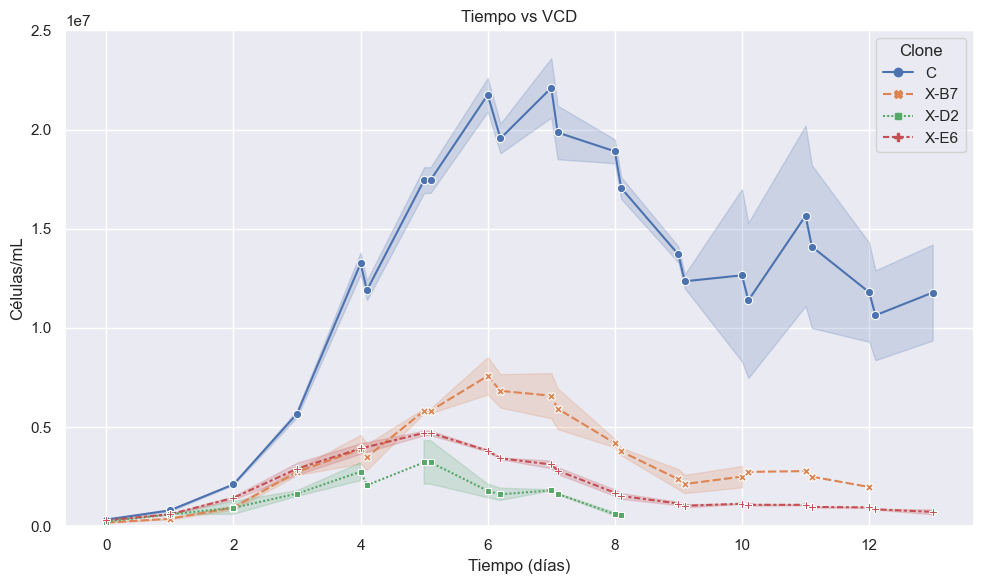

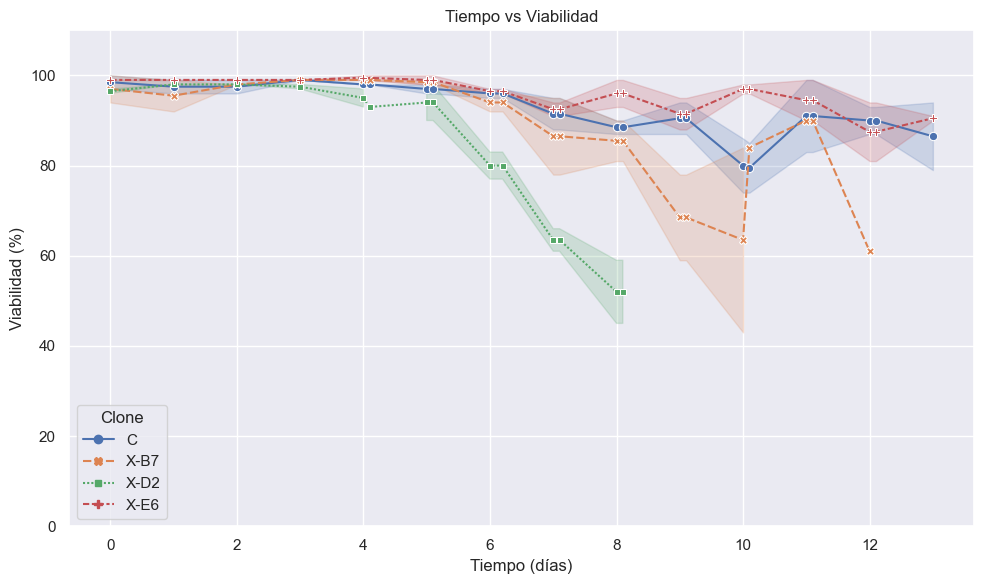

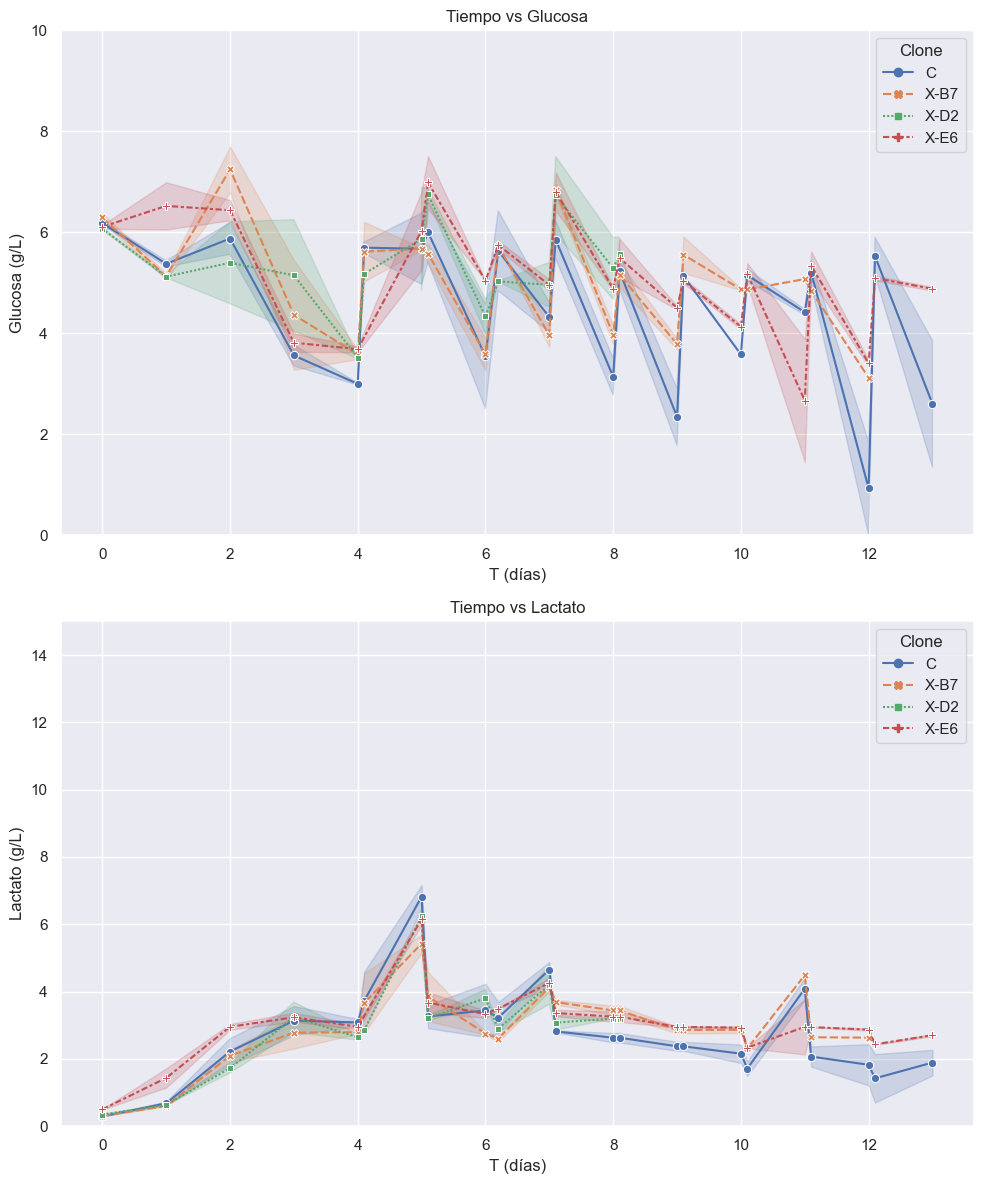

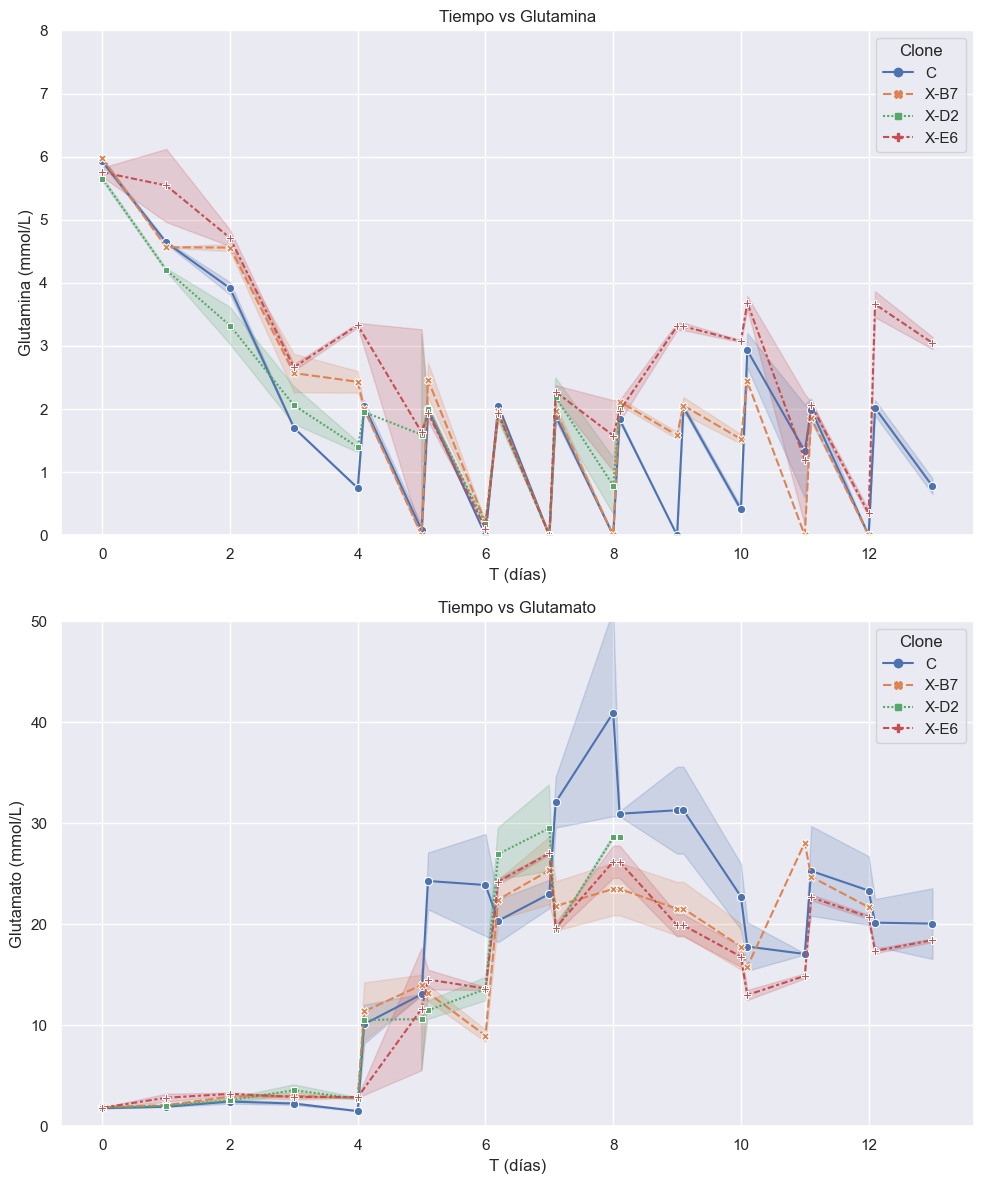

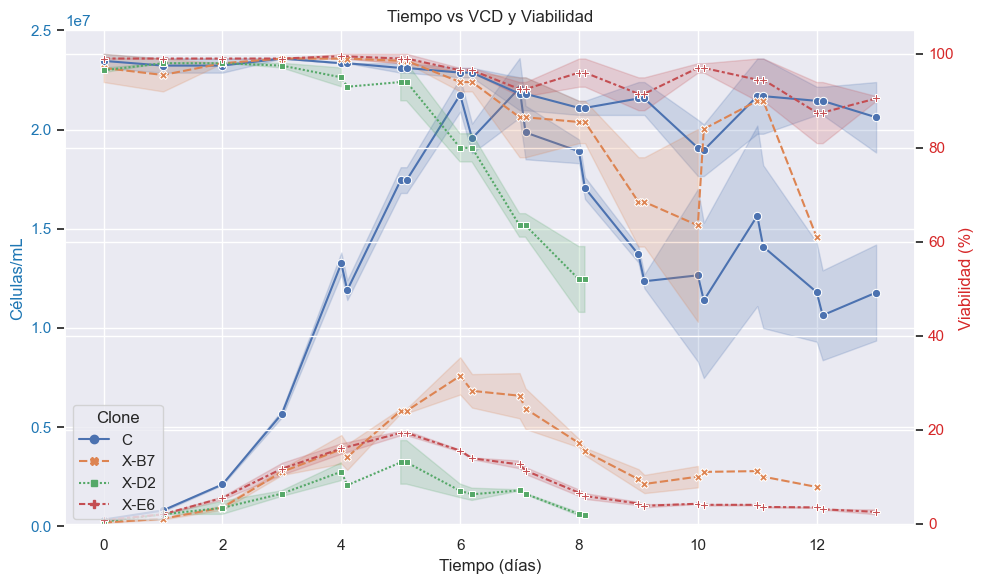

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configurar el tema del gráfico
sns.set_theme(style="darkgrid")

# Gráfico: Tiempo vs VCD
plt.figure(figsize=(10, 6))
sns.lineplot(x="T (días)", y="Xv (células/mL)", hue="Clone", style="Clone", markers=True, data=df)
plt.xlabel('Tiempo (días)')
plt.ylabel('Células/mL')
plt.ylim(0, 25000000)
plt.title('Tiempo vs VCD')
plt.grid(True)
plt.legend(title='Clone')
plt.tight_layout()
plt.savefig("grafica_vcd.png", format="png", dpi=300)
plt.show()

# Gráfico: Tiempo vs Viabilidad
plt.figure(figsize=(10, 6))
sns.lineplot(x="T (días)", y="Viabilidad", hue="Clone", style="Clone", markers=True, data=df)
plt.xlabel('Tiempo (días)')
plt.ylabel('Viabilidad (%)')
plt.title('Tiempo vs Viabilidad')
plt.ylim(0, 110)
plt.grid(True)
plt.legend(title='Clone')
plt.tight_layout()
plt.savefig("grafica_viabilidad.png", format="png", dpi=300)
plt.show()

# Subgráficos: Glucosa y Lactato vs Tiempo
fig, axes = plt.subplots(2, 1, figsize=(10, 12))
sns.lineplot(ax=axes[0], x="T (días)", y="G (g/L)", hue="Clone", style="Clone", markers=True, data=df)
axes[0].set_title('Tiempo vs Glucosa')
axes[0].set_ylabel('Glucosa (g/L)')
axes[0].set_ylim(0, 10)
axes[0].grid(True)
axes[0].legend(title='Clone')

sns.lineplot(ax=axes[1], x="T (días)", y="L (g/L)", hue="Clone", style="Clone", markers=True, data=df)
axes[1].set_title('Tiempo vs Lactato')
axes[1].set_ylabel('Lactato (g/L)')
axes[1].set_ylim(0, 15)
axes[1].grid(True)
axes[1].legend(title='Clone')

fig.tight_layout()
fig.savefig("grafica_glucosa_y_lactato.png", format="png", dpi=300)
plt.show()

# Subgráficos: Glutamina y Glutamato vs Tiempo
fig, axes = plt.subplots(2, 1, figsize=(10, 12))
sns.lineplot(ax=axes[0], x="T (días)", y="Gln (mmol/L)", hue="Clone", style="Clone", markers=True, data=df)
axes[0].set_title('Tiempo vs Glutamina')
axes[0].set_ylabel('Glutamina (mmol/L)')
axes[0].set_ylim(0, 8)
axes[0].grid(True)
axes[0].legend(title='Clone')

sns.lineplot(ax=axes[1], x="T (días)", y="Glu (mmol/L)", hue="Clone", style="Clone", markers=True, data=df)
axes[1].set_title('Tiempo vs Glutamato')
axes[1].set_ylabel('Glutamato (mmol/L)')
axes[1].set_ylim(0, 50)
axes[1].grid(True)
axes[1].legend(title='Clone')

fig.tight_layout()
fig.savefig("grafica_glutamina_y_glutamato.png", format="png", dpi=300)
plt.show()

# Gráfico con dos ejes Y: Tiempo vs VCD y Viabilidad
fig, ax1 = plt.subplots(figsize=(10, 6))
ax1.set_xlabel('Tiempo (días)')
ax1.set_ylabel('Células/mL', color='tab:blue')
sns.lineplot(ax=ax1, x="T (días)", y="Xv (células/mL)", hue="Clone", style="Clone", markers=True, data=df, legend=False)
ax1.tick_params(axis='y', labelcolor='tab:blue')
ax1.set_ylim(0, 25000000)

ax2 = ax1.twinx()
ax2.set_ylabel('Viabilidad (%)', color='tab:red')
sns.lineplot(ax=ax2, x="T (días)", y="Viabilidad", hue="Clone", style="Clone", markers=True, data=df)
ax2.tick_params(axis='y', labelcolor='tab:red')
ax2.set_ylim(-0.5, 105)

plt.title('Tiempo vs VCD y Viabilidad')
fig.tight_layout()
plt.grid(True)
fig.savefig("grafica_vcd_viabilidad.png", format="png", dpi=300)
plt.show()


In [20]:
import numpy as np
from scipy.stats import linregress

# Lista de clonas
clonas = df["Clone"].unique()

# Diccionario para guardar resultados de cada clona
resultados_clonas = {}

# Ciclo para cada clona
for clona in clonas:
    # Crear DataFrame individual para la clona y agrupar por tiempo
    df_clone = df[df["Clone"] == clona].groupby("T (días)").mean(numeric_only=True).reset_index()

    # Convertir la columna de Glucosa (G (g/L)) a mmol/L
    df_clone["G (mmol/L)"] = df_clone["G (g/L)"] * 1000 / 180.16

    # Convertir Xv de células/mL a células/L
    df_clone["Xv (células/L)"] = df_clone["Xv (células/mL)"] * 1e3

    # Calcular ln(Xv)
    df_clone["ln(Xv)"] = np.log(df_clone["Xv (células/L)"])

    # Usar solo los datos entre tiempo 0 y 4 días
    df_subset = df_clone[(df_clone["T (días)"] >= 0) & (df_clone["T (días)"] <= 4)]

    # Regresión lineal para calcular mu
    slope_mu, intercept_mu, r_value_mu, p_value_mu, std_err_mu = linregress(
        df_subset["T (días)"], df_subset["ln(Xv)"]
    )
    mu = slope_mu  # La pendiente es mu

    # Calcular el promedio de los deltas intermedios para ΔX
    delta_X_values = df_subset["Xv (células/L)"].diff().dropna()
    delta_X = delta_X_values.mean() * len(delta_X_values)

    # Calcular los cambios totales de glucosa y glutamina (usando solo los valores inicial y final)
    delta_G = df_subset["G (mmol/L)"].iloc[-1] - df_subset["G (mmol/L)"].iloc[0]  # ΔG
    delta_Gln = df_subset["Gln (mmol/L)"].iloc[-1] - df_subset["Gln (mmol/L)"].iloc[0]  # ΔGln

    # Calcular los rendimientos Yx/s para glucosa y glutamina
    Yx_G = delta_X / abs(delta_G)  # Rendimiento biomasa/glucosa
    Yx_Gln = delta_X / abs(delta_Gln)  # Rendimiento biomasa/glutamina

    # Calcular los consumos específicos basados en el tiempo inicial y final
    delta_t = df_subset["T (días)"].iloc[-1] - df_subset["T (días)"].iloc[0]
    X_promedio = (df_subset["Xv (células/L)"].iloc[0] + df_subset["Xv (células/L)"].iloc[-1]) / 2

    # Tasa de cambio de glucosa y glutamina (usando valores iniciales y finales)
    promedio_delta_G_dt = delta_G / delta_t
    promedio_delta_Gln_dt = delta_Gln / delta_t

    # Consumos específicos
    q_G = promedio_delta_G_dt / X_promedio
    q_Gln = promedio_delta_Gln_dt / X_promedio

    # Guardar los resultados en el diccionario
    resultados_clonas[clona] = {
        "Mu (d^-1)": mu,
        "Delta Glucosa (mmol/L)": delta_G,
        "Delta Glutamina (mmol/L)": delta_Gln,
        "Promedio ΔX (células/L)": delta_X,
        "Yx_G (células/L/mmol)": Yx_G,
        "Yx_Gln (células/L/mmol)": Yx_Gln,
        "Promedio Delta_G/Delta_t (mmol/L/día)": promedio_delta_G_dt,
        "Promedio Delta_Gln/Delta_t (mmol/L/día)": promedio_delta_Gln_dt,
        "Promedio X (células/L)": X_promedio,
        "Promedio q_G (mmol/célula·día)": q_G,
        "Promedio q_Gln (mmol/célula·día)": q_Gln,
    }

# Imprimir resultados en notación científica para cada clona
for clona, resultados in resultados_clonas.items():
    print(f"\nResultados para la clona {clona}:")
    for key, value in resultados.items():
        print(f"{key}: {value:.2e}")



Resultados para la clona C:
Mu (d^-1): 9.31e-01
Delta Glucosa (mmol/L): -1.77e+01
Delta Glutamina (mmol/L): -5.18e+00
Promedio ΔX (células/L): 1.29e+10
Yx_G (células/L/mmol): 7.30e+08
Yx_Gln (células/L/mmol): 2.49e+09
Promedio Delta_G/Delta_t (mmol/L/día): -4.42e+00
Promedio Delta_Gln/Delta_t (mmol/L/día): -1.29e+00
Promedio X (células/L): 6.79e+09
Promedio q_G (mmol/célula·día): -6.51e-10
Promedio q_Gln (mmol/célula·día): -1.91e-10

Resultados para la clona X-B7:
Mu (d^-1): 8.08e-01
Delta Glucosa (mmol/L): -1.50e+01
Delta Glutamina (mmol/L): -3.55e+00
Promedio ΔX (células/L): 3.70e+09
Yx_G (células/L/mmol): 2.46e+08
Yx_Gln (células/L/mmol): 1.04e+09
Promedio Delta_G/Delta_t (mmol/L/día): -3.76e+00
Promedio Delta_Gln/Delta_t (mmol/L/día): -8.87e-01
Promedio X (células/L): 2.03e+09
Promedio q_G (mmol/célula·día): -1.85e-09
Promedio q_Gln (mmol/célula·día): -4.36e-10

Resultados para la clona X-D2:
Mu (d^-1): 5.95e-01
Delta Glucosa (mmol/L): -1.42e+01
Delta Glutamina (mmol/L): -4.25e+00

In [21]:
# Lista de clonas
clonas = df["Clone"].unique()

# Lista para almacenar los resultados
resultados_clonas = []

# Ciclo para cada clona
for clona in clonas:
    # Crear DataFrame individual para la clona y agrupar por tiempo
    df_clone = df[df["Clone"] == clona].groupby("T (días)").mean(numeric_only=True).reset_index()

    # Convertir la columna de Glucosa (G (g/L)) a mmol/L
    df_clone["G (mmol/L)"] = df_clone["G (g/L)"] * 1000 / 180.16

    # Convertir Xv de células/mL a células/L
    df_clone["Xv (células/L)"] = df_clone["Xv (células/mL)"] * 1e3

    # Calcular ln(Xv)
    df_clone["ln(Xv)"] = np.log(df_clone["Xv (células/L)"])

    # Usar solo los datos entre tiempo 0 y 4 días
    df_subset = df_clone[(df_clone["T (días)"] >= 0) & (df_clone["T (días)"] <= 4)]

    # Regresión lineal para calcular mu
    slope_mu, intercept_mu, r_value_mu, p_value_mu, std_err_mu = linregress(
        df_subset["T (días)"], df_subset["ln(Xv)"]
    )
    mu = slope_mu  # La pendiente es mu

    # Calcular el promedio de los deltas intermedios para ΔX
    delta_X_values = df_subset["Xv (células/L)"].diff().dropna()
    delta_X = delta_X_values.mean() * (len(delta_X_values))

    # Calcular los cambios totales de glucosa y glutamina (usando solo los valores inicial y final)
    delta_G = df_subset["G (mmol/L)"].iloc[-1] - df_subset["G (mmol/L)"].iloc[0]  # ΔG
    delta_Gln = df_subset["Gln (mmol/L)"].iloc[-1] - df_subset["Gln (mmol/L)"].iloc[0]  # ΔGln

    # Calcular los rendimientos Yx/s para glucosa y glutamina
    Yx_G = delta_X / abs(delta_G)  # Rendimiento biomasa/glucosa
    Yx_Gln = delta_X / abs(delta_Gln)  # Rendimiento biomasa/glutamina

    # Calcular los consumos específicos basados en el tiempo inicial y final
    delta_t = df_subset["T (días)"].iloc[-1] - df_subset["T (días)"].iloc[0]
    X_promedio = (df_subset["Xv (células/L)"].iloc[0] + df_subset["Xv (células/L)"].iloc[-1]) / 2

    # Tasa de cambio de glucosa y glutamina (usando valores iniciales y finales)
    promedio_delta_G_dt = delta_G / delta_t
    promedio_delta_Gln_dt = delta_Gln / delta_t

    # Consumos específicos
    q_G = abs(promedio_delta_G_dt / X_promedio)  # Tomar valores absolutos para consumos
    q_Gln = abs(promedio_delta_Gln_dt / X_promedio)

    # Guardar los resultados en la lista como un diccionario
    resultados_clonas.append({
        "Clona": clona,
        "Mu (d^-1)": mu,
        "Delta Glucosa (mmol/L)": delta_G,
        "Delta Glutamina (mmol/L)": delta_Gln,
        "Promedio ΔX (células/L)": delta_X,
        "Yx_G (células/L/mmol)": Yx_G,
        "Yx_Gln (células/L/mmol)": Yx_Gln,
        "Promedio Delta_G/Delta_t (mmol/L/día)": promedio_delta_G_dt,
        "Promedio Delta_Gln/Delta_t (mmol/L/día)": promedio_delta_Gln_dt,
        "Promedio X (células/L)": X_promedio,
        "Consumo específico de Glucosa (mmol/célula·día)": q_G,
        "Consumo específico de Glutamina (mmol/célula·día)": q_Gln,
    })

# Crear un DataFrame consolidado a partir de la lista de resultados
df_resultados = pd.DataFrame(resultados_clonas)

# Mostrar el DataFrame consolidado
display(df_resultados)

,Clona,Mu (d^-1),Delta Glucosa (mmol/L),Delta Glutamina (mmol/L),Promedio ΔX (células/L),Yx_G (células/L/mmol),Yx_Gln (células/L/mmol),Promedio Delta_G/Delta_t (mmol/L/día),Promedio Delta_Gln/Delta_t (mmol/L/día),Promedio X (células/L),Consumo específico de Glucosa (mmol/célula·día),Consumo específico de Glutamina (mmol/célula·día)
0,C,0.930762,-17.683375,-5.177067,1.291400e+10,7.302904e+08,2.494462e+09,-4.420844,-1.294267,6.793000e+09,6.507940e-10,1.905295e-10
1,X-B7,0.808375,-15.046504,-3.546141,3.697000e+09,2.457049e+08,1.042542e+09,-3.761626,-0.886535,2.031500e+09,1.851649e-09,4.363944e-10
2,X-D2,0.594520,-14.162991,-4.253987,2.517000e+09,1.777167e+08,5.916802e+08,-3.540748,-1.063497,1.491500e+09,2.373951e-09,7.130384e-10
3,X-E6,0.666776,-13.450671,-2.423292,3.614000e+09,2.686855e+08,1.491360e+09,-3.362668,-0.605823,2.113000e+09,1.591419e-09,2.867122e-10


,Clona,Mu (d^-1),Delta Glucosa (mmol/L),Delta Glutamina (mmol/L),Promedio ΔX (células/L),Yx_G (células/L/mmol),Yx_Gln (células/L/mmol),Promedio Delta_G/Delta_t (mmol/L/día),Promedio Delta_Gln/Delta_t (mmol/L/día),Promedio X (células/L),Consumo específico de Glucosa (mmol/célula·día),Consumo específico de Glutamina (mmol/célula·día)
0,C,0.930762,-17.683375,-5.177067,1.291400e+10,7.302904e+08,2.494462e+09,-4.420844,-1.294267,6.793000e+09,6.507940e-10,1.905295e-10
1,X-B7,0.808375,-15.046504,-3.546141,3.697000e+09,2.457049e+08,1.042542e+09,-3.761626,-0.886535,2.031500e+09,1.851649e-09,4.363944e-10
2,X-D2,0.594520,-14.162991,-4.253987,2.517000e+09,1.777167e+08,5.916802e+08,-3.540748,-1.063497,1.491500e+09,2.373951e-09,7.130384e-10
3,X-E6,0.666776,-13.450671,-2.423292,3.614000e+09,2.686855e+08,1.491360e+09,-3.362668,-0.605823,2.113000e+09,1.591419e-09,2.867122e-10


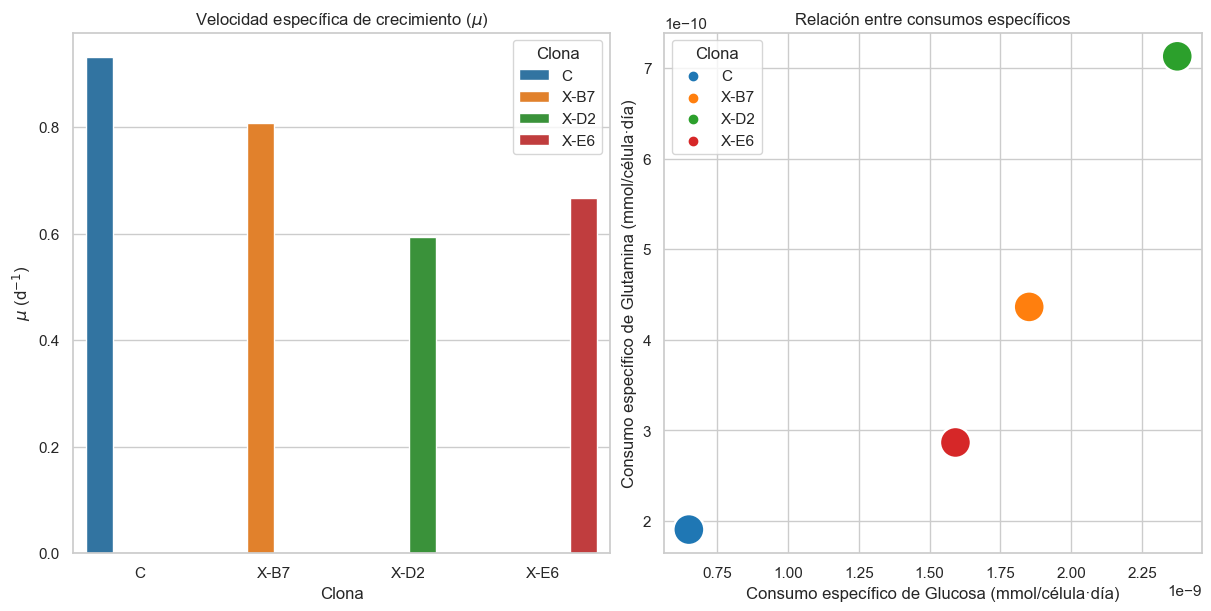

In [10]:
import pandas as pd
import numpy as np
from scipy.stats import linregress
import matplotlib.pyplot as plt
import seaborn as sns

# Crear el DataFrame consolidado
df_resultados = pd.DataFrame(resultados_clonas)

display(df_resultados)


# Configurar estilo general
sns.set_theme(style="whitegrid")

# Crear figura con dos subgráficas y ajustar diseño automáticamente
fig, axes = plt.subplots(1, 2, figsize=(12, 6), constrained_layout=True)

# Primera gráfica: Barras para mu
sns.barplot(
    data=df_resultados, 
    x="Clona", 
    y="Mu (d^-1)",
    hue='Clona',
    palette="tab10", 
    ax=axes[0]
)
axes[0].set_xlabel("Clona")
axes[0].set_ylabel(r"$\mu$ (d$^{-1}$)")  # Cadena raw para evitar problemas
axes[0].set_title(r"Velocidad específica de crecimiento ($\mu$)")  # Cadena raw para evitar problemas

# Segunda gráfica: Dispersión para consumos específicos
sns.scatterplot(
    data=df_resultados,
    x="Consumo específico de Glucosa (mmol/célula·día)",
    y="Consumo específico de Glutamina (mmol/célula·día)",
    hue="Clona",
    palette="tab10",
    s=500,  # Tamaño de los puntos
    ax=axes[1]
)
axes[1].set_xlabel("Consumo específico de Glucosa (mmol/célula·día)")
axes[1].set_ylabel("Consumo específico de Glutamina (mmol/célula·día)")
axes[1].set_title("Relación entre consumos específicos")
axes[1].legend(title="Clona", loc="best")  # Leyenda ajustada

# Guardar la figura en formato PNG
plt.savefig("mu_qgluc_qgln.png", dpi=300)
plt.show()


In [8]:
    # Lista de clonas
    clonas = df["Clone"].unique()

    # Diccionario para guardar resultados de cada clona
    resultados_clonas = {}

    # Ciclo para cada clona
    for clona in clonas:
        # Crear DataFrame individual para la clona y agrupar por tiempo
        df_clone = df[df["Clone"] == clona].groupby("T (días)").mean(numeric_only=True).reset_index()

        # Convertir la columna de Glucosa (G (g/L)) a mmol/L
        df_clone["G (mmol/L)"] = df_clone["G (g/L)"] * 1000 / 180.16

        # Convertir Xv de células/mL a células/L
        df_clone["Xv (células/L)"] = df_clone["Xv (células/mL)"] * 1e3

        # Calcular ln(Xv)
        df_clone["ln(Xv)"] = np.log(df_clone["Xv (células/L)"])

        # Usar solo los datos entre tiempo 0 y 4 días
        df_subset = df_clone[(df_clone["T (días)"] >= 0) & (df_clone["T (días)"] <= 4)]

        # Regresión lineal para calcular mu
        slope_mu, intercept_mu, r_value_mu, p_value_mu, std_err_mu = linregress(
            df_subset["T (días)"], df_subset["ln(Xv)"]
        )
        mu = slope_mu  # La pendiente es mu

        # Calcular el promedio de los deltas intermedios para ΔX
        delta_X_values = df_subset["Xv (células/L)"].diff().dropna()
        delta_X = delta_X_values.mean() * (len(delta_X_values))

        # Calcular los cambios totales de glucosa y glutamina (usando solo los valores inicial y final)
        delta_G = df_subset["G (mmol/L)"].iloc[-1] - df_subset["G (mmol/L)"].iloc[0]  # ΔG
        delta_Gln = df_subset["Gln (mmol/L)"].iloc[-1] - df_subset["Gln (mmol/L)"].iloc[0]  # ΔGln

        # Calcular los rendimientos Yx/s para glucosa y glutamina
        Yx_G = delta_X / abs(delta_G)  # Rendimiento biomasa/glucosa
        Yx_Gln = delta_X / abs(delta_Gln)  # Rendimiento biomasa/glutamina

        # Calcular los consumos específicos basados en el tiempo inicial y final
        delta_t = df_subset["T (días)"].iloc[-1] - df_subset["T (días)"].iloc[0]
        X_promedio = (df_subset["Xv (células/L)"].iloc[0] + df_subset["Xv (células/L)"].iloc[-1]) / 2

        # Tasa de cambio de glucosa y glutamina (usando valores iniciales y finales)
        promedio_delta_G_dt = delta_G / delta_t
        promedio_delta_Gln_dt = delta_Gln / delta_t

        # Consumos específicos
        q_G = promedio_delta_G_dt / X_promedio
        q_Gln = promedio_delta_Gln_dt / X_promedio

        # Guardar los resultados en el diccionario
        resultados_clonas[clona] = {
            "Mu (d^-1)": mu,
            "Delta Glucosa (mmol/L)": delta_G,
            "Delta Glutamina (mmol/L)": delta_Gln,
            "Promedio ΔX (células/L)": delta_X,
            "Yx_G (células/L/mmol)": Yx_G,
            "Yx_Gln (células/L/mmol)": Yx_Gln,
            "Promedio Delta_G/Delta_t (mmol/L/día)": promedio_delta_G_dt,
            "Promedio Delta_Gln/Delta_t (mmol/L/día)": promedio_delta_Gln_dt,
            "Promedio X (células/L)": X_promedio,
            "Promedio q_G (mmol/célula·día)": q_G,
            "Promedio q_Gln (mmol/célula·día)": q_Gln,
        }

    # Imprimir resultados en notación científica para cada clona
    for clona, resultados in resultados_clonas.items():
        print(f"\nResultados para la clona {clona}:")
        for key, value in resultados.items():
            print(f"{key}: {value:.2e}")



Resultados para la clona C:
Mu (d^-1): 9.31e-01
Delta Glucosa (mmol/L): -1.21e+01
Delta Glutamina (mmol/L): -5.18e+00
Promedio ΔX (células/L): 1.29e+10
Yx_G (células/L/mmol): 1.06e+09
Yx_Gln (células/L/mmol): 2.49e+09
Promedio Delta_G/Delta_t (mmol/L/día): -3.03e+00
Promedio Delta_Gln/Delta_t (mmol/L/día): -1.29e+00
Promedio X (células/L): 6.79e+09
Promedio q_G (mmol/célula·día): -4.47e-10
Promedio q_Gln (mmol/célula·día): -1.91e-10

Resultados para la clona X-B7:
Mu (d^-1): 8.08e-01
Delta Glucosa (mmol/L): -9.50e+00
Delta Glutamina (mmol/L): -3.55e+00
Promedio ΔX (células/L): 3.70e+09
Yx_G (células/L/mmol): 3.89e+08
Yx_Gln (células/L/mmol): 1.04e+09
Promedio Delta_G/Delta_t (mmol/L/día): -2.37e+00
Promedio Delta_Gln/Delta_t (mmol/L/día): -8.87e-01
Promedio X (células/L): 2.03e+09
Promedio q_G (mmol/célula·día): -1.17e-09
Promedio q_Gln (mmol/célula·día): -4.36e-10

Resultados para la clona X-D2:
Mu (d^-1): 5.95e-01
Delta Glucosa (mmol/L): -8.61e+00
Delta Glutamina (mmol/L): -4.25e+00

In [42]:
# Lista de clonas
clonas = df["Clone"].unique()

# Lista para almacenar los resultados
resultados_clonas = []

# Ciclo para cada clona
for clona in clonas:
    # Crear DataFrame individual para la clona y agrupar por tiempo
    df_clone = df[df["Clone"] == clona].groupby("T (días)").mean(numeric_only=True).reset_index()

    # Convertir la columna de Glucosa (G (g/L)) a mmol/L
    df_clone["G (mmol/L)"] = df_clone["G (g/L)"] * 1000 / 180.16

    # Convertir Xv de células/mL a células/L
    df_clone["Xv (células/L)"] = df_clone["Xv (células/mL)"] * 1e3

    # Calcular ln(Xv)
    df_clone["ln(Xv)"] = np.log(df_clone["Xv (células/L)"])

    # Usar solo los datos entre tiempo 0 y 4 días
    df_subset = df_clone[(df_clone["T (días)"] >= 0) & (df_clone["T (días)"] <= 4)]

    # Regresión lineal para calcular mu
    slope_mu, intercept_mu, r_value_mu, p_value_mu, std_err_mu = linregress(
        df_subset["T (días)"], df_subset["ln(Xv)"]
    )
    mu = slope_mu  # La pendiente es mu

    # Calcular el promedio de los deltas intermedios para ΔX
    delta_X_values = df_subset["Xv (células/L)"].diff().dropna()
    delta_X = delta_X_values.mean() * (len(delta_X_values))

    # Calcular los cambios totales de glucosa y glutamina (usando solo los valores inicial y final)
    delta_G = df_subset["G (mmol/L)"].iloc[-1] - df_subset["G (mmol/L)"].iloc[0]  # ΔG
    delta_Gln = df_subset["Gln (mmol/L)"].iloc[-1] - df_subset["Gln (mmol/L)"].iloc[0]  # ΔGln

    # Calcular los rendimientos Yx/s para glucosa y glutamina
    Yx_G = delta_X / abs(delta_G)  # Rendimiento biomasa/glucosa
    Yx_Gln = delta_X / abs(delta_Gln)  # Rendimiento biomasa/glutamina

    # Calcular los consumos específicos basados en el tiempo inicial y final
    delta_t = df_subset["T (días)"].iloc[-1] - df_subset["T (días)"].iloc[0]
    X_promedio = (df_subset["Xv (células/L)"].iloc[0] + df_subset["Xv (células/L)"].iloc[-1]) / 2

    # Tasa de cambio de glucosa y glutamina (usando valores iniciales y finales)
    promedio_delta_G_dt = delta_G / delta_t
    promedio_delta_Gln_dt = delta_Gln / delta_t

    # Consumos específicos
    q_G = abs(promedio_delta_G_dt / X_promedio)  # Tomar valores absolutos para consumos
    q_Gln = abs(promedio_delta_Gln_dt / X_promedio)

    # Guardar los resultados en la lista como un diccionario
    resultados_clonas.append({
        "Clona": clona,
        "Mu (d^-1)": mu,
        "Delta Glucosa (mmol/L)": delta_G,
        "Delta Glutamina (mmol/L)": delta_Gln,
        "Promedio ΔX (células/L)": delta_X,
        "Yx_G (células/L/mmol)": Yx_G,
        "Yx_Gln (células/L/mmol)": Yx_Gln,
        "Promedio Delta_G/Delta_t (mmol/L/día)": promedio_delta_G_dt,
        "Promedio Delta_Gln/Delta_t (mmol/L/día)": promedio_delta_Gln_dt,
        "Promedio X (células/L)": X_promedio,
        "Consumo específico de Glucosa (mmol/célula·día)": q_G,
        "Consumo específico de Glutamina (mmol/célula·día)": q_Gln,
    })

# Crear un DataFrame consolidado a partir de la lista de resultados
df_resultados = pd.DataFrame(resultados_clonas)

# Mostrar el DataFrame consolidado
display(df_resultados)

,Clona,Mu (d^-1),Delta Glucosa (mmol/L),Delta Glutamina (mmol/L),Promedio ΔX (células/L),Yx_G (células/L/mmol),Yx_Gln (células/L/mmol),Promedio Delta_G/Delta_t (mmol/L/día),Promedio Delta_Gln/Delta_t (mmol/L/día),Promedio X (células/L),Consumo específico de Glucosa (mmol/célula·día),Consumo específico de Glutamina (mmol/célula·día)
0,C,0.930762,-17.683375,-5.177067,1.291400e+10,7.302904e+08,2.494462e+09,-4.420844,-1.294267,6.793000e+09,6.507940e-10,1.905295e-10
1,X-B7,0.808375,-15.046504,-3.546141,3.697000e+09,2.457049e+08,1.042542e+09,-3.761626,-0.886535,2.031500e+09,1.851649e-09,4.363944e-10
2,X-D2,0.594520,-14.162991,-4.253987,2.517000e+09,1.777167e+08,5.916802e+08,-3.540748,-1.063497,1.491500e+09,2.373951e-09,7.130384e-10
3,X-E6,0.666776,-13.450671,-2.423292,3.614000e+09,2.686855e+08,1.491360e+09,-3.362668,-0.605823,2.113000e+09,1.591419e-09,2.867122e-10


## **Gráficas de parámetros cinéticos y estequiométricos**

,Clona,Mu (d^-1),Delta Glucosa (mmol/L),Delta Glutamina (mmol/L),Promedio ΔX (células/L),Yx_G (células/L/mmol),Yx_Gln (células/L/mmol),Promedio Delta_G/Delta_t (mmol/L/día),Promedio Delta_Gln/Delta_t (mmol/L/día),Promedio X (células/L),Consumo específico de Glucosa (mmol/célula·día),Consumo específico de Glutamina (mmol/célula·día)
0,C,0.930762,-12.132754,-5.177067,1.291400e+10,1.064392e+09,2.494462e+09,-3.033188,-1.294267,6.793000e+09,4.465168e-10,1.905295e-10
1,X-B7,0.808375,-9.495882,-3.546141,3.697000e+09,3.893267e+08,1.042542e+09,-2.373970,-0.886535,2.031500e+09,1.168580e-09,4.363944e-10
2,X-D2,0.594520,-8.612369,-4.253987,2.517000e+09,2.922541e+08,5.916802e+08,-2.153092,-1.063497,1.491500e+09,1.443575e-09,7.130384e-10
3,X-E6,0.666776,-7.900049,-2.423292,3.614000e+09,4.574655e+08,1.491360e+09,-1.975012,-0.605823,2.113000e+09,9.346958e-10,2.867122e-10


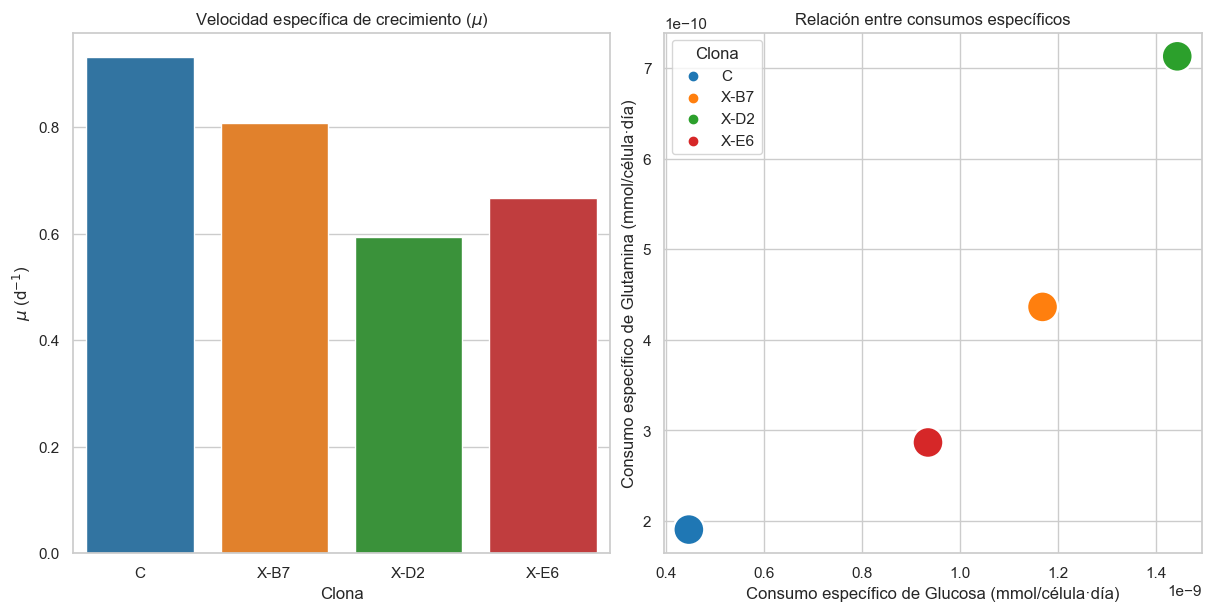

In [47]:
# Lista de clonas
clonas = df["Clone"].unique()

# Lista para almacenar los resultados
resultados_clonas = []

# Ciclo para cada clona
for clona in clonas:
    # Crear DataFrame individual para la clona y agrupar por tiempo
    df_clone = df[df["Clone"] == clona].groupby("T (días)").mean(numeric_only=True).reset_index()

    # Convertir la columna de Glucosa (G (g/L)) a mmol/L
    df_clone["G (mmol/L)"] = df_clone["G (g/L)"] * 1000 / 180.16

    # Convertir Xv de células/mL a células/L
    df_clone["Xv (células/L)"] = df_clone["Xv (células/mL)"] * 1e3

    # Calcular ln(Xv)
    df_clone["ln(Xv)"] = np.log(df_clone["Xv (células/L)"])

    # Usar solo los datos entre tiempo 0 y 4 días
    df_subset = df_clone[(df_clone["T (días)"] >= 0) & (df_clone["T (días)"] <= 4)]

    # Regresión lineal para calcular mu
    slope_mu, intercept_mu, r_value_mu, p_value_mu, std_err_mu = linregress(
        df_subset["T (días)"], df_subset["ln(Xv)"]
    )
    mu = slope_mu  # La pendiente es mu

    # Calcular el promedio de los deltas intermedios para ΔX
    delta_X_values = df_subset["Xv (células/L)"].diff().dropna()
    delta_X = delta_X_values.mean() * (len(delta_X_values))

    # Calcular los cambios totales de glucosa y glutamina (usando solo los valores inicial y final)
    delta_G = df_subset["G (mmol/L)"].iloc[-1] - df_subset["G (mmol/L)"].iloc[0]  # ΔG
    delta_Gln = df_subset["Gln (mmol/L)"].iloc[-1] - df_subset["Gln (mmol/L)"].iloc[0]  # ΔGln

    # Calcular los rendimientos Yx/s para glucosa y glutamina
    Yx_G = delta_X / abs(delta_G)  # Rendimiento biomasa/glucosa
    Yx_Gln = delta_X / abs(delta_Gln)  # Rendimiento biomasa/glutamina

    # Calcular los consumos específicos basados en el tiempo inicial y final
    delta_t = df_subset["T (días)"].iloc[-1] - df_subset["T (días)"].iloc[0]
    X_promedio = (df_subset["Xv (células/L)"].iloc[0] + df_subset["Xv (células/L)"].iloc[-1]) / 2

    # Tasa de cambio de glucosa y glutamina (usando valores iniciales y finales)
    promedio_delta_G_dt = delta_G / delta_t
    promedio_delta_Gln_dt = delta_Gln / delta_t

    # Consumos específicos
    q_G = abs(promedio_delta_G_dt / X_promedio)  # Tomar valores absolutos para consumos
    q_Gln = abs(promedio_delta_Gln_dt / X_promedio)

    # Guardar los resultados en la lista como un diccionario
    resultados_clonas.append({
        "Clona": clona,
        "Mu (d^-1)": mu,
        "Delta Glucosa (mmol/L)": delta_G,
        "Delta Glutamina (mmol/L)": delta_Gln,
        "Promedio ΔX (células/L)": delta_X,
        "Yx_G (células/L/mmol)": Yx_G,
        "Yx_Gln (células/L/mmol)": Yx_Gln,
        "Promedio Delta_G/Delta_t (mmol/L/día)": promedio_delta_G_dt,
        "Promedio Delta_Gln/Delta_t (mmol/L/día)": promedio_delta_Gln_dt,
        "Promedio X (células/L)": X_promedio,
        "Consumo específico de Glucosa (mmol/célula·día)": q_G,
        "Consumo específico de Glutamina (mmol/célula·día)": q_Gln,
    })

# Crear un DataFrame consolidado a partir de la lista de resultados
df_resultados = pd.DataFrame(resultados_clonas)

# Mostrar el DataFrame consolidado
display(df_resultados)




import matplotlib.pyplot as plt
import seaborn as sns

# Configurar estilo general
sns.set_theme(style="whitegrid")

# Crear figura con dos subgráficas y ajustar diseño automáticamente
fig, axes = plt.subplots(1, 2, figsize=(12, 6), constrained_layout=True)  # `constrained_layout` para evitar problemas

# Primera gráfica: Barras para mu
sns.barplot(
    data=df_resultados, 
    x="Clona", 
    y="Mu (d^-1)", 
    palette="tab10", 
    ax=axes[0]
)
axes[0].set_xlabel("Clona")
axes[0].set_ylabel(r"$\mu$ (d$^{-1}$)")
axes[0].set_title("Velocidad específica de crecimiento ($\mu$)")

# Segunda gráfica: Dispersión para consumos específicos
sns.scatterplot(
    data=df_resultados,
    x="Consumo específico de Glucosa (mmol/célula·día)",
    y="Consumo específico de Glutamina (mmol/célula·día)",
    hue="Clona",
    palette="tab10",
    s=500,  # Tamaño de los puntos
    ax=axes[1]
)
axes[1].set_xlabel("Consumo específico de Glucosa (mmol/célula·día)")
axes[1].set_ylabel("Consumo específico de Glutamina (mmol/célula·día)")
axes[1].set_title("Relación entre consumos específicos")
axes[1].legend(title="Clona", loc="best")  # Leyenda ajustada

# Guardar la figura en formato PNG
plt.savefig("mu_qgluc_qgln.png", dpi=300)  # Ajustar `dpi` para mayor calidad
plt.show()



## Estadística

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# Cargar los datos
df = pd.read_csv('Datos_cinetica_06nov2024.csv', skiprows=1)
df.columns = df.columns.str.strip()  # Remover espacios en blanco de los nombres de las columnas

# Renombrar columnas
df.rename(columns={
    "T": "T (días)",
    "G": "G (g/L)",
    "Gln": "Gln (mmol/L)",
    "Xv": "Xv (células/mL)",
    "Xm": "Xm (células/mL)",
    "L": "L (g/L)",
    "Glu": "Glu (mmol/L)"
}, inplace=True)

# Limpiar datos excepto la columna Clone
for col in df.columns:
    if col == "Clone":
        continue
    if df[col].dtype == object:
        df[col] = pd.to_numeric(df[col].str.replace('%', '', regex=False), errors='coerce')
    elif df[col].dtype in [int, float]:
        df[col] = pd.to_numeric(df[col], errors='coerce')

# Convertir 'Clone' a categórico
df["Clone"] = df["Clone"].astype("category")

# Eliminar filas de la clona 'C'
df = df[df['Clone'] != 'C']